In [3]:
import pandas as pd
import numpy as np
import re
import shap
import joblib
from sklearn.model_selection import train_test_split

In [4]:
def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

In [6]:
lgbm_optim = joblib.load('../models/lgbm_hyperoptim_class_weight.pkl')

In [7]:
df = pd.read_csv('../data/preprocessing_train.csv')

best_features = pd.read_csv('../data/best_features.csv')
best_features = clean_feature_names(best_features)
feats = np.array(best_features.columns)
feats = np.append(feats,'INTERET_CUMULE' )
df = clean_feature_names(df)

In [8]:
df = df[df['TARGET'].notnull()]

X = df[feats]
        
y = df['TARGET']

In [9]:
set(X.columns)

{'ACTIVE_AMT_ANNUITY_MEAN',
 'ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_DEBT_SUM',
 'ACTIVE_AMT_CREDIT_SUM_MEAN',
 'ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN',
 'ACTIVE_CREDIT_DAY_OVERDUE_MEAN',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MIN',
 'ACTIVE_DAYS_CREDIT_MEAN',
 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN',
 'ACTIVE_DAYS_CREDIT_VAR',
 'ACTIVE_MONTHS_BALANCE_SIZE_MEAN',
 'AMT_ANNUITY',
 'ANNUITY_INCOME_PERC',
 'APPROVED_AMT_ANNUITY_MAX',
 'APPROVED_AMT_GOODS_PRICE_MIN',
 'APPROVED_APP_CREDIT_PERC_MEAN',
 'APPROVED_APP_CREDIT_PERC_VAR',
 'APPROVED_CNT_PAYMENT_MEAN',
 'BASEMENTAREA_AVG',
 'BURO_AMT_CREDIT_MAX_OVERDUE_MEAN',
 'BURO_AMT_CREDIT_SUM_LIMIT_SUM',
 'BURO_AMT_CREDIT_SUM_MEAN',
 'BURO_AMT_CREDIT_SUM_SUM',
 'BURO_CREDIT_ACTIVE_Active_MEAN',
 'BURO_CREDIT_ACTIVE_Closed_MEAN',
 'BURO_CREDIT_ACTIVE_Sold_MEAN',
 'BURO_CREDIT_TYPE_Credit_card_MEAN',
 'BURO_CREDIT_TYPE_Microloan_MEAN',
 'BURO_CREDIT_TYPE_Mortgage_MEAN',
 'BURO_DAYS_CREDIT_ENDDATE_MAX',
 'BURO_DAYS_CREDIT_ENDDATE_MIN',
 'BURO

In [37]:
lgbm_optim.fit(X, y)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.


[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1


LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.02, max_depth=8,
               min_child_weight=39.3259775, min_split_gain=0.0222415,
               n_estimators=10000, nthread=4, num_leaves=34,
               reg_alpha=0.041545473, reg_lambda=0.0735294, silent=-1,
               subsample=0.8715623)

In [38]:
explainer = shap.TreeExplainer(lgbm_optim)

# Calculer les Shap values pour toutes les observations
shap_values_global = explainer.shap_values(X)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


SHAP values pour la classe 0:


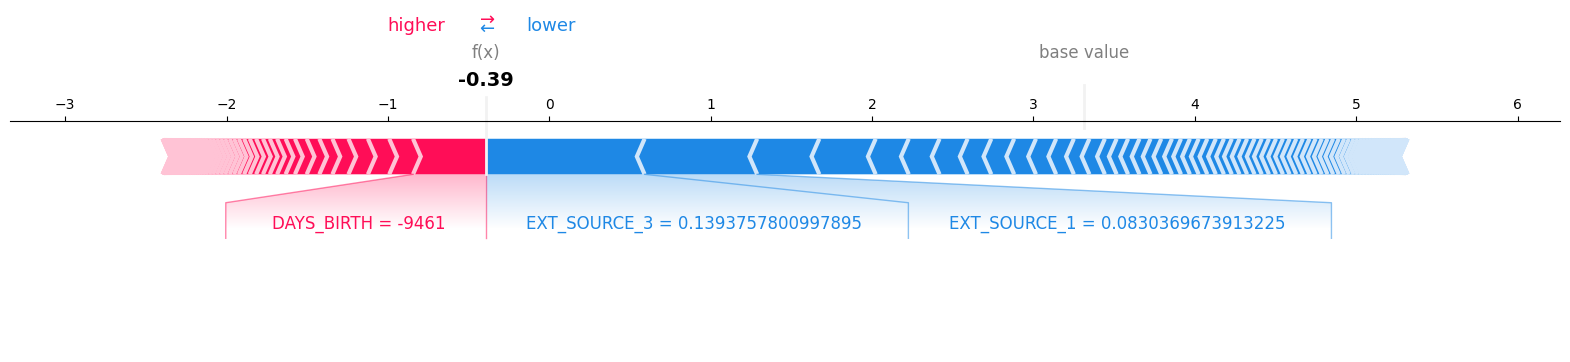

SHAP values pour la classe 1:


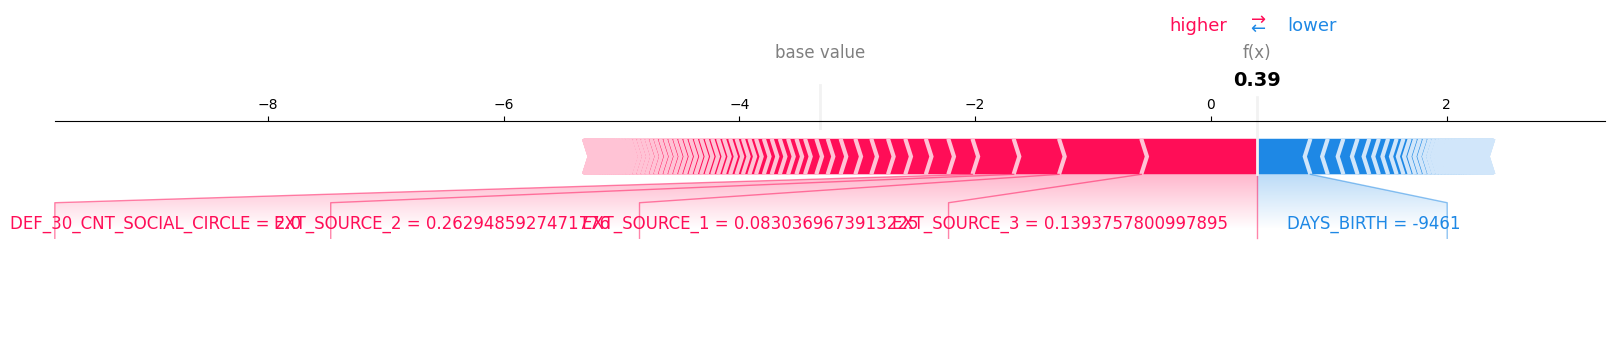

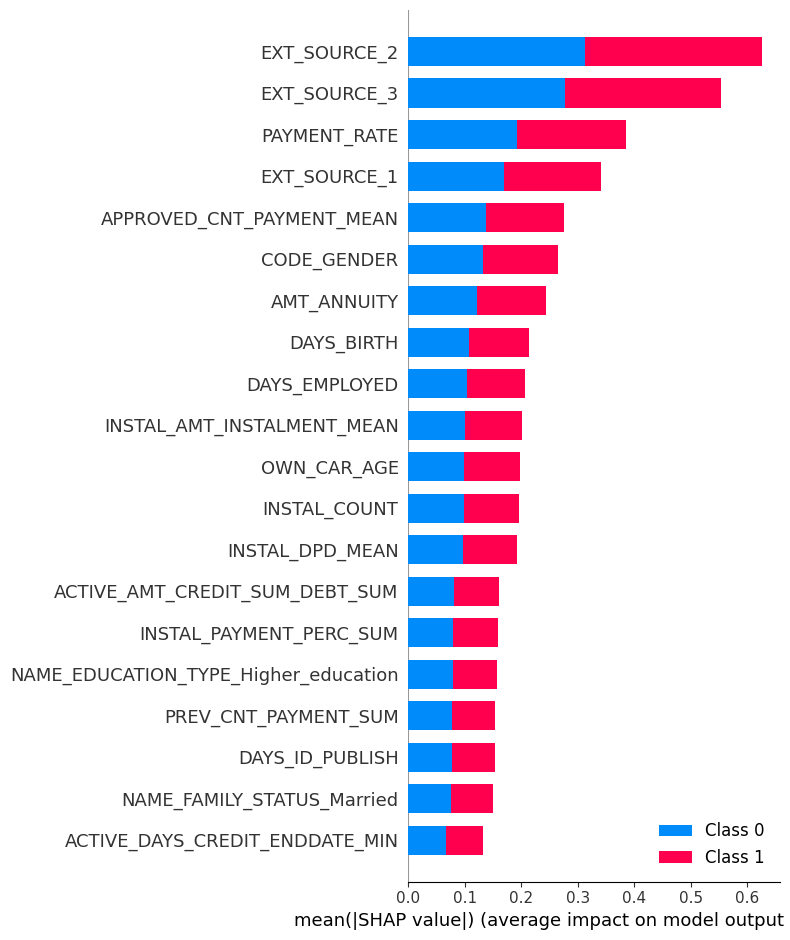

In [39]:
index_individu = 0  # Remplacez par l'index de l'individu que vous souhaitez analyser
X_individu = X.iloc[[index_individu]]

# Calculer les Shap values pour cet individu
shap_values_individu = explainer.shap_values(X_individu)

# Afficher les résultats pour cet individu
shap.initjs()

# Affichage du plot force pour l'individu spécifique (explicatif pour chaque classe)
if isinstance(shap_values_individu, list):
    # Cas pour les problèmes multi-classes
    for i, shap_values_class in enumerate(shap_values_individu):
        print(f"SHAP values pour la classe {i}:")
        shap.force_plot(explainer.expected_value[i], shap_values_class, X_individu, matplotlib=True)
else:
    # Cas pour les problèmes de classification binaire ou régression
    shap.force_plot(explainer.expected_value, shap_values_individu, X_individu, matplotlib=True)

shap.summary_plot(shap_values_global, X)